# The Energy balance of the earth

## The naked planet model

We want to calculate the radiation model of a simplified planet without greenhouse gases, the so called naked planet model$^\ast$. The temperature of this planet is determined by balancing energy fluxes in and out of this planet. The energy that comes to the planet is provided by the sun. The planet itself radiates energy to an extent that depends on its temperature. The planet is characterised by a layer of water what serves as a buffer and stores energy until an equilibrium is reached and incoming and outgoing fluxes are balanced.

The incoming solarheat is determined by $\frac{L (1- \alpha)}{4}$, with the solar constant $L$ (which is not a constant!) and the albedo $\alpha$ (between 0 and 1) of the planet. The factor 4 can be derived from the relation between the shadow of the planet with an area of $\pi r^2$ to the total surface of $4 \pi r^2$.

The outgoing heat depends on the temperature of the planet according to the Stefan-Boltzmann law, which is $\epsilon \cdot \sigma \cdot T^4$, with the emissivity of the planet (between 0 and 1, with 1 if the object is a black body that absorbs all electromagnetic radiation), the Stefan-Boltzmann constant $\sigma$ = 5.67$\cdot$ 10$^{-8}\frac{W}{m^2 K^4}$, and the current temperature of the planet $T$. 

Depending on the initial temperature of the planet, the incoming and out-going energy fluxes are not balanced and result in a warming (or cooling) of the planet. If we start with an initial temperature of 0K, the planet will absorb more energy than it emits, thus the total internal energy of the planet rises. The energy is stored by a layer of water with a predefined depth. 

$^\ast$An example of the naked planet model is also given in the [Coursera Course on Global warming](https://www.coursera.org/lecture/global-warming/naked-planet-climate-model-xWZsI), if you would like to use additional materials.

**TODO**: Please import the libraries `numpy` and `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**TODO**: Define all the important variables: The solar constant, albedo of the planet, depth of the water layer, specific heat capacity of water, heat capacity of the water column (we canceled out the area from both, incoming and out-going energy fluxes, and thereby only consider a column of 1m$^2$ (keep in mind the specific heat capacity of water is in \[J/g K\]), epsilon and sigma. Add all units (and any additional infos you need) with a command `#`

In [2]:
sc = 1361 # kw/m^2
albedo = 0.33 # estimation
wat_depth = 3940 # average in m
wat_dens = 997 # kg^3/m
wat_cap = 4.184 # J/g * K
cap = wat_depth * wat_cap * 10**3 * wat_dens
eps = 1.
sig = 5.67 * (10**-8)

In [3]:
l = 1366   # W/m2
albedo = 0.3 # []
h = 4000   # depth of the ocean in meters
rho = 1000 # density of water [kg/m3]
capacity_water = 4.186 # heat capacity of water in [J/g K]
capacity = h * capacity_water * 10**3 * rho # J/m2 K # specific heat capacity of water times density of water
epsilon = 1. # []
sigma = 5.67E-8  # W/(m2 K4)

We want to track the temperature changes over time, starting with an inital temperature, e.g. t$_0$ = 0K. After sufficient timesteps it will approach an equilibrium.

**TODO**: Create an array of *time* with np.arange(start, end, step), starting with $t_0$ = 0, end with 1500 and timesteps of 20 years. You can choose also other timeperiods and -steps, but keep in mind that some combination may not work because they are numerically unstable

In [4]:
time = np.arange(0, 1500, 20)

In [5]:
step = 20 # in years
time = np.arange(0, 1500, step)

The heat capacity of the planet is set by a layer of water that absorbs the incoming energy and thus changes its temperature. It depends on the specific heat capacity of water (4.186 \[ J g$^{-1}$K$^{-1}$ \], the depth of the water layer in \[m\] and the density of water.

As energy is added to the planet, the heat content is changing as a function of time by the incoming and out-going fluxes:

$\frac{d(heat\_content)}{dt}$ = $\frac{L (1- \alpha)}{4}$ - $\sigma \cdot \epsilon \cdot T^4$.

If the first term is larger than the second, the heat content will increase. If the second term is larger, the heat content will decrease.

The heat content of a matter is related to the temperature by the heat capacity:

T\(K\) = $\frac{\textrm{heat_content}[J/m^2]}{\textrm{heat_capacity} [J/m^2  K]}$.

Heat capacity is the amount of heat required to raise the temperature of an object by 1K.

We can solve this numerically:

heat_content(t+1) = heat_content(t) + $\frac{d(heat\_content)}{dt}$ $\cdot$ timestep 

The incoming radiation will stay constant throughout the simulation. The outgoing radiation is governed by the temperature that is updated in each timestep.

**TODO**: We will start with a heat content and temperature of the planet of 0 J/m$^2$K and 0K respectively. The variable heat_content will be overwritten in each step of a for-loop, while we want to keep track of the temperature by generating a list and appending the lastest termperature in each time step. Add the equation of the incoming and out-going energy fluxes to the for-loop. Keep in mind, that each timestep is in years and we need a factor to transfere years to seconds.

Hint: list\[-1\] calls the last item of a list

In [6]:
heat_content = 0.
temp = [0]

heat_in =  sc*(1-albedo)/4 # add here the equation of incoming energy flux
heat_out = 0
heat_content =  cap * temp[0]

for i in time:   
    heat_out = eps * sig * pow(temp[-1], 4)# add here the equation of the out-going energy fluxes
    heat_content_per_dt = heat_in - heat_out
    heat_content = heat_content + (heat_content_per_dt \
                    * 20 * 3.14E7)
    #print(i, temp[-1])
    temp.append(heat_content/ cap) 

In [7]:
heat_content = 0.
temp = [0]

heat_in = l*(1-albedo)/4
heat_out = 0
heat_content =  capacity * temp[0]

for i in time:   
    heat_out = epsilon * sigma * pow(temp[-1], 4)
    heat_content_per_dt = heat_in - heat_out
    heat_content = heat_content + (heat_content_per_dt \
                    * step * 3.14E7)
    #print(i, temp[-1])
    temp.append(heat_content/ capacity) 

**TODO**: Plot the calculated temperature curve over time, e.g. with matplotlib.

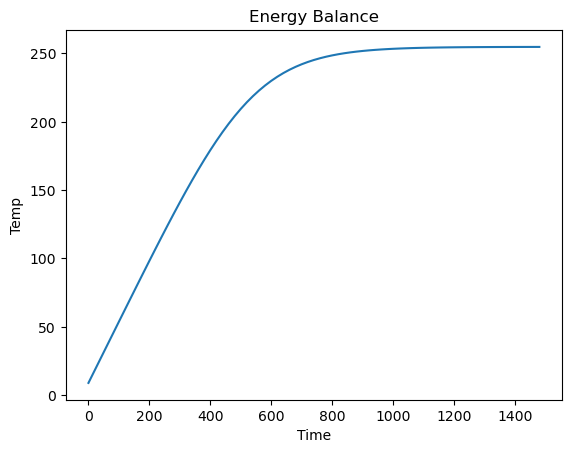

In [8]:
plt.xlabel('Time')
plt.ylabel('Temp')
plt.title('Energy Balance')
plt.plot(time, temp[1:])

In [9]:
#plt.xlabel('Time [y]')
#plt.ylabel('Temerature [K]')

#plt.title('The naked planet model')
#plt.plot(time, temp[1:])

**TODO** : Imagine the albedo decreases by 0.03. How does this changes the temperature? Add the new temperature curve to your plot.

In [10]:
albedo = 0.36

heat_content = 0.
temp = [0]

heat_in =  sc*(1-albedo)/4 # add here the equation of incoming energy flux
heat_out = 0
heat_content =  cap * temp[0]

for i in time:   
    heat_out = eps * sig * pow(temp[-1], 4)# add here the equation of the out-going energy fluxes
    heat_content_per_dt = heat_in - heat_out
    heat_content = heat_content + (heat_content_per_dt \
                    * 20 * 3.14E7)
    #print(i, temp[-1])
    temp.append(heat_content/ cap) 

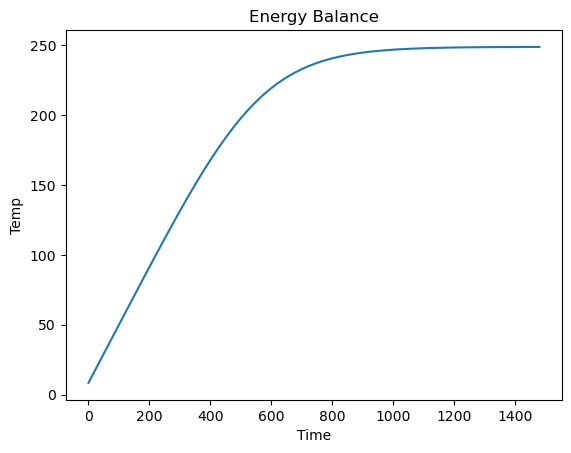

In [11]:
plt.xlabel('Time')
plt.ylabel('Temp')
plt.title('Energy Balance')
plt.plot(time, temp[1:])

**Question**: What would be necessary to add the effect of greenhouse gases in the atmosphere to this model? How could it be implemented? How would this affect the temperature?